In [250]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_df = pd.merge(ride, city, how='left', on=["city"])
# Display the data table for preview
# city_ride_df.columns
# city_ride_df.set_index('type')

In [255]:
#group by city name 

groupbycity_df = city_ride_df.groupby("city")

groupbycity_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


In [264]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

ave_fare = groupbycity_df.mean()['fare']
total_ride = groupbycity_df.count()['ride_id']
total_driver = groupbycity_df.max()['driver_count']
city_type = city.set_index('city')['type']


In [265]:
# ave_fare 

In [266]:
# total_ride

In [267]:
# total_driver

In [268]:
# city_type

In [293]:
#for reference 
ref_df = pd.DataFrame({
                      "Average Fare":ave_fare ,
                      "Number of Drivers":total_driver,
                      "Total Ride": total_ride,
                      "City Type": city_type})


ref_df.head()

,Average Fare,Number of Drivers,Total Ride,City Type
Amandaburgh,24.641667,12,18,Urban
Barajasview,25.332273,26,22,Urban
Barronchester,36.422500,11,16,Suburban
Bethanyland,32.956111,22,18,Suburban
Bradshawfurt,40.064000,7,10,Rural


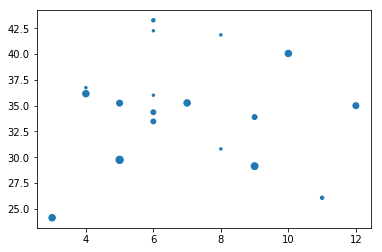

In [271]:
#x for rural: total number of rides of each city, y axis: ave fare $ of each city, size: driver count of each city 
#filter rural 
Rural_cities = city_ride_df[city_ride_df["type"] == "Rural"]
Rural_cities.head(10)
#get x axis total number of rides of each city in urban using .count method to count by unique ride_ids
total_ride_Ruralcities= Rural_cities.groupby(["city"]).count()["ride_id"]

#get y axis:ave fare $ of each city in urbar using .mean method
avg_fare_Ruralcities = Rural_cities.groupby(["city"]).mean()["fare"]

#get size of the bubble: driver count of each city in urban, each city has one value 
driver_num_Ruralcities = Rural_cities.groupby(["city"]).max()["driver_count"]

plt.scatter(total_ride_Ruralcities, avg_fare_Ruralcities, s=6*driver_num_Ruralcities)

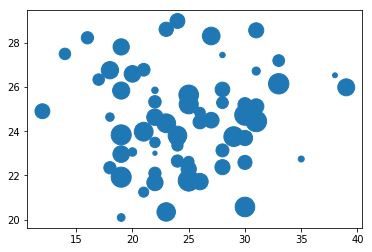

In [276]:
#x for rural: total number of rides of each city, y axis: ave fare $ of each city, size: driver count of each city 
#filter rural 
Urban_cities = city_ride_df[city_ride_df["type"] == "Urban"]
Urban_cities.head(10)
#get x axis total number of rides of each city in urban using .count method to count by unique ride_ids
total_ride_Urbancities= Urban_cities.groupby(["city"]).count()["ride_id"]

#get y axis:ave fare $ of each city in urbar using .mean method
avg_fare_Urbancities = Urban_cities.groupby(["city"]).mean()["fare"]

#get size of the bubble: driver count of each city in urban, each city has one value 
driver_num_Urbancities = Urban_cities.groupby(["city"]).max()["driver_count"]

plt.scatter(total_ride_Urbancities, avg_fare_Urbancities, s=6*driver_num_Urbancities)

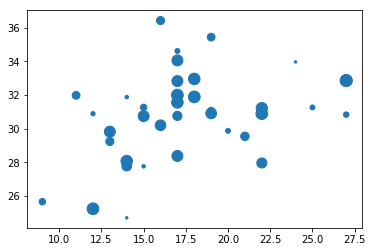

In [277]:
#x for Suburban: total number of rides of each city, y axis: ave fare $ of each city, size: driver count of each city 
#filter rural 
Suburban_cities = city_ride_df[city_ride_df["type"] == "Suburban"]
Suburban_cities.head(10)
#get x axis total number of rides of each city in urban using .count method to count by unique ride_ids
total_ride_Suburbancities= Suburban_cities.groupby(["city"]).count()["ride_id"]

#get y axis:ave fare $ of each city in urbar using .mean method
avg_fare_Suburbancities = Suburban_cities.groupby(["city"]).mean()["fare"]

#get size of the bubble: driver count of each city in urban, each city has one value 
driver_num_Suburbancities = Suburban_cities.groupby(["city"]).max()["driver_count"]

plt.scatter(total_ride_Suburbancities, avg_fare_Suburbancities, s=6*driver_num_Suburbancities)

In [278]:

# * You must use the Pandas Library and the Jupyter Notebook.
# * You must use the Matplotlib library.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# * Remember when making your plots to consider aesthetics!
#   * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
# * See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

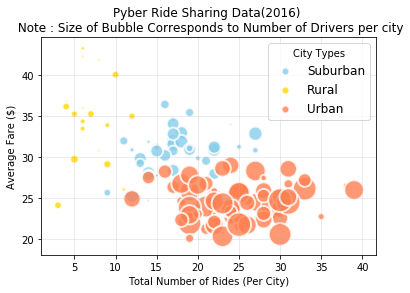

In [298]:
plt.scatter(total_ride_Suburbancities, avg_fare_Suburbancities, s=8*driver_num_Suburbancities, 
            c="skyblue", 
            edgecolor="white", 
            alpha=0.8,
            linewidths = 2,
            label="Suburban")
plt.scatter(total_ride_Ruralcities, avg_fare_Ruralcities, s=8*driver_num_Ruralcities, 
            c="gold", 
            edgecolor="white", 
            alpha=0.8, 
            linewidths = 2,
            label="Rural")
plt.scatter(total_ride_urbancities, avg_fare_urbancities, s=8*driver_num_urbancities, 
            c="coral", 
            edgecolor="white",  
            alpha=0.8, 
            linewidths = 2,
            label="Urban")

#add legend, resize marker 
legend= plt.legend(fontsize = 12, title="City Types", markerscale=0.5)
plt.grid(alpha = 0.3)

legend.legendHandles[0]._sizes = [60]
legend.legendHandles[1]._sizes = [60]
legend.legendHandles[2]._sizes = [60]

#x,y,title and note 

plt.title("Pyber Ride Sharing Data(2016) \n Note : Size of Bubble Corresponds to Number of Drivers per city")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# plt.annotate("Note:Circle size correlates with driver count per city.")
# plt.gcf().text(0.02, 0.5, " ", fontsize=14)
plt.show()

In [275]:
# * percentage of Total Fares by City Type

fare_percents = city_ride_df.groupby(["type"]).sum()["fare"] / city_ride_df["fare"].sum()
fare_percents

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

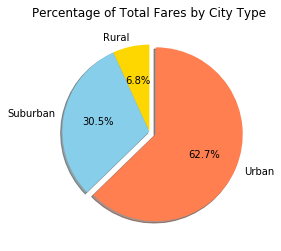

In [152]:
#plot fare total percentage 
plt.pie(fare_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"], 
        shadow = True,
        explode=[0, 0, 0.08], 
        startangle=90,
        autopct='%1.1f%%', 
        )
plt.title("Percentage of Total Fares by City Type")

plt.show()

In [153]:
# * percentage of Total Rides by City Type
ride_percents = city_ride_df.groupby(["type"]).count()["ride_id"]/city_ride_df["ride_id"].count()
ride_percents

type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64

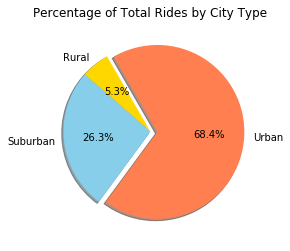

In [155]:
#plot ride total percentage 
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"], 
        shadow = True,
        explode=[0, 0, 0.08], 
        startangle=120,
        autopct='%1.1f%%', 
        )
plt.title("Percentage of Total Rides by City Type")

plt.show()

In [118]:
#* percentage of Total Drivers by City Type
driver_percents = city_ride_df.groupby(["type"]).sum()["driver_count"]/city_ride_df["driver_count"].sum()
driver_percents

type
Rural       0.007816
Suburban    0.124729
Urban       0.867456
Name: driver_count, dtype: float64

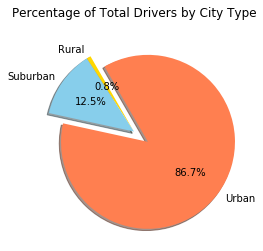

In [160]:
#plot driver total percentage 
plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"], 
        shadow = True,
        explode=[0, 0, 0.2], 
        startangle=120,
        autopct='%1.1f%%', 
        )
plt.title("Percentage of Total Drivers by City Type")

plt.show()


### Analysis
1. no clear relation between total ride counts and average fare in rural areas. 
2. cheaper average fare in urban rides, it might due to shorter rides in urban. 
3. total number of drivers in urban area is more than 80%, may cause over supply and lower fare. 